In [38]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import glob
import matplotlib.pyplot as plt
from PIL import Image
import random
import os
import numpy as np
from matplotlib import cm
from  matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array
from keras_preprocessing.image import array_to_img
from scipy.stats import norm
import pandas as pd
from tensorflow.keras import datasets, layers, models


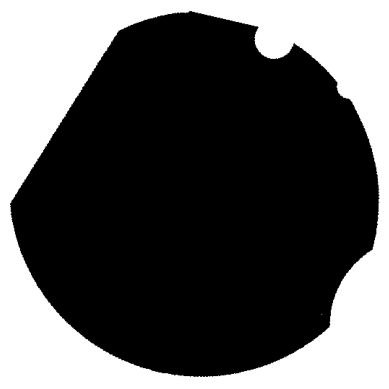

In [39]:

# load the mask image
maskim = Image.open('./mask.png')
maskdata = np.array(maskim, dtype='i2')

plt.figure()
plt.axis('off')
plt.imshow(maskim, cmap='gray_r')


In [40]:
directory = "../kernels/"
df = pd.read_csv(directory + "attenuations.csv")
images = []
KW = 12
KH = 12
batch_size=len(df)
image_size = (KW,KH)

#i = 0
for index, row in df.iterrows():
    filename = directory + row[2]
    img = load_img(filename, target_size=image_size)
    img_array = img_to_array(img)
    #if(i < 10):
        #print(row[1])
        #im = Image.open(filename)
        #im.show()
    #i += 1
    #img_array = tf.expand_dims(img_array, 0)  # Create batch axis
    images.append(img_array)
df["image"] = images
dataset = tf.data.Dataset.from_tensor_slices((list(df['image'].values), df['attenuation'].values))
#dataset = dataset.batch(batch_size).cache().prefetch(buffer_size=tf.data.AUTOTUNE)

test_split = int(batch_size * 0.2)
#dataset.shuffle(batch_size)
test_dataset = dataset.take(test_split) 
train_dataset = dataset.skip(test_split).take(batch_size-test_split)
test_dataset = test_dataset.batch(test_split).cache().prefetch(buffer_size=tf.data.AUTOTUNE)
train_dataset = train_dataset.batch(batch_size-test_split).cache().prefetch(buffer_size=tf.data.AUTOTUNE)



In [41]:
model = models.Sequential()
model.add(layers.Conv2D(12, (3, 3), activation='relu', strides=2, padding="same", input_shape=(12, 12, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', strides=2, padding="same"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', strides=2, padding="same"))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 6, 6, 12)          336       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 12)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 2, 64)          6976      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 1, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [43]:
model.compile(optimizer=keras.optimizers.Adam(lr=1e-06), loss='mean_squared_error')
#model.summary()
epochs = 1000

# model.compile(
#     optimizer=keras.optimizers.Adam(1e-6),
#     #optimizer='sgd',
#     loss='mse',
#     metrics=[tf.keras.metrics.MeanSquaredError()]
# )


In [44]:
history = model.fit(
    train_dataset,
    epochs=epochs,
)


Epoch 1/1000
1/1 [==============================] - 0s 406ms/step - loss: 16.5105
Epoch 2/1000
1/1 [==============================] - 0s 19ms/step - loss: 16.4314
Epoch 3/1000
1/1 [==============================] - 0s 22ms/step - loss: 16.3525
Epoch 4/1000
1/1 [==============================] - 0s 18ms/step - loss: 16.2739
Epoch 5/1000
1/1 [==============================] - 0s 20ms/step - loss: 16.1956
Epoch 6/1000
1/1 [==============================] - 0s 19ms/step - loss: 16.1175
Epoch 7/1000
1/1 [==============================] - 0s 16ms/step - loss: 16.0396
Epoch 8/1000
1/1 [==============================] - 0s 22ms/step - loss: 15.9619
Epoch 9/1000
1/1 [==============================] - 0s 19ms/step - loss: 15.8846
Epoch 10/1000
1/1 [==============================] - 0s 22ms/step - loss: 15.8074
Epoch 11/1000
1/1 [==============================] - 0s 19ms/step - loss: 15.7304
Epoch 12/1000
1/1 [==============================] - 0s 18ms/step - loss: 15.6537
Epoch 13/1000
1/1 [=====

Epoch 101/1000
1/1 [==============================] - 0s 21ms/step - loss: 10.0570
Epoch 102/1000
1/1 [==============================] - 0s 18ms/step - loss: 10.0076
Epoch 103/1000
1/1 [==============================] - 0s 17ms/step - loss: 9.9584
Epoch 104/1000
1/1 [==============================] - 0s 17ms/step - loss: 9.9096
Epoch 105/1000
1/1 [==============================] - 0s 18ms/step - loss: 9.8610
Epoch 106/1000
1/1 [==============================] - 0s 16ms/step - loss: 9.8127
Epoch 107/1000
1/1 [==============================] - 0s 16ms/step - loss: 9.7647
Epoch 108/1000
1/1 [==============================] - 0s 15ms/step - loss: 9.7170
Epoch 109/1000
1/1 [==============================] - 0s 16ms/step - loss: 9.6695
Epoch 110/1000
1/1 [==============================] - 0s 18ms/step - loss: 9.6223
Epoch 111/1000
1/1 [==============================] - 0s 17ms/step - loss: 9.5754
Epoch 112/1000
1/1 [==============================] - 0s 17ms/step - loss: 9.5287
Epoch 113/1000

1/1 [==============================] - 0s 14ms/step - loss: 6.3632
Epoch 201/1000
1/1 [==============================] - 0s 14ms/step - loss: 6.3367
Epoch 202/1000
1/1 [==============================] - 0s 15ms/step - loss: 6.3103
Epoch 203/1000
1/1 [==============================] - 0s 18ms/step - loss: 6.2842
Epoch 204/1000
1/1 [==============================] - 0s 16ms/step - loss: 6.2582
Epoch 205/1000
1/1 [==============================] - 0s 16ms/step - loss: 6.2325
Epoch 206/1000
1/1 [==============================] - 0s 18ms/step - loss: 6.2069
Epoch 207/1000
1/1 [==============================] - 0s 18ms/step - loss: 6.1815
Epoch 208/1000
1/1 [==============================] - 0s 19ms/step - loss: 6.1563
Epoch 209/1000
1/1 [==============================] - 0s 18ms/step - loss: 6.1313
Epoch 210/1000
1/1 [==============================] - 0s 18ms/step - loss: 6.1064
Epoch 211/1000
1/1 [==============================] - 0s 18ms/step - loss: 6.0817
Epoch 212/1000
1/1 [===========

1/1 [==============================] - 0s 18ms/step - loss: 4.4981
Epoch 301/1000
1/1 [==============================] - 0s 19ms/step - loss: 4.4861
Epoch 302/1000
1/1 [==============================] - 0s 16ms/step - loss: 4.4742
Epoch 303/1000
1/1 [==============================] - 0s 20ms/step - loss: 4.4625
Epoch 304/1000
1/1 [==============================] - 0s 19ms/step - loss: 4.4508
Epoch 305/1000
1/1 [==============================] - 0s 17ms/step - loss: 4.4392
Epoch 306/1000
1/1 [==============================] - 0s 17ms/step - loss: 4.4277
Epoch 307/1000
1/1 [==============================] - 0s 18ms/step - loss: 4.4163
Epoch 308/1000
1/1 [==============================] - 0s 18ms/step - loss: 4.4051
Epoch 309/1000
1/1 [==============================] - 0s 17ms/step - loss: 4.3939
Epoch 310/1000
1/1 [==============================] - 0s 16ms/step - loss: 4.3828
Epoch 311/1000
1/1 [==============================] - 0s 18ms/step - loss: 4.3719
Epoch 312/1000
1/1 [===========

1/1 [==============================] - 0s 17ms/step - loss: 3.7104
Epoch 401/1000
1/1 [==============================] - 0s 17ms/step - loss: 3.7058
Epoch 402/1000
1/1 [==============================] - 0s 14ms/step - loss: 3.7011
Epoch 403/1000
1/1 [==============================] - 0s 17ms/step - loss: 3.6966
Epoch 404/1000
1/1 [==============================] - 0s 16ms/step - loss: 3.6920
Epoch 405/1000
1/1 [==============================] - 0s 17ms/step - loss: 3.6875
Epoch 406/1000
1/1 [==============================] - 0s 17ms/step - loss: 3.6831
Epoch 407/1000
1/1 [==============================] - 0s 18ms/step - loss: 3.6787
Epoch 408/1000
1/1 [==============================] - 0s 17ms/step - loss: 3.6743
Epoch 409/1000
1/1 [==============================] - 0s 20ms/step - loss: 3.6700
Epoch 410/1000
1/1 [==============================] - 0s 19ms/step - loss: 3.6657
Epoch 411/1000
1/1 [==============================] - 0s 18ms/step - loss: 3.6615
Epoch 412/1000
1/1 [===========

1/1 [==============================] - 0s 17ms/step - loss: 3.4069
Epoch 501/1000
1/1 [==============================] - 0s 18ms/step - loss: 3.4050
Epoch 502/1000
1/1 [==============================] - 0s 18ms/step - loss: 3.4031
Epoch 503/1000
1/1 [==============================] - 0s 18ms/step - loss: 3.4012
Epoch 504/1000
1/1 [==============================] - 0s 19ms/step - loss: 3.3994
Epoch 505/1000
1/1 [==============================] - 0s 17ms/step - loss: 3.3975
Epoch 506/1000
1/1 [==============================] - 0s 19ms/step - loss: 3.3957
Epoch 507/1000
1/1 [==============================] - 0s 18ms/step - loss: 3.3939
Epoch 508/1000
1/1 [==============================] - 0s 16ms/step - loss: 3.3921
Epoch 509/1000
1/1 [==============================] - 0s 17ms/step - loss: 3.3903
Epoch 510/1000
1/1 [==============================] - 0s 17ms/step - loss: 3.3886
Epoch 511/1000
1/1 [==============================] - 0s 17ms/step - loss: 3.3868
Epoch 512/1000
1/1 [===========

1/1 [==============================] - 0s 20ms/step - loss: 3.2680
Epoch 601/1000
1/1 [==============================] - 0s 18ms/step - loss: 3.2669
Epoch 602/1000
1/1 [==============================] - 0s 18ms/step - loss: 3.2658
Epoch 603/1000
1/1 [==============================] - 0s 17ms/step - loss: 3.2648
Epoch 604/1000
1/1 [==============================] - 0s 18ms/step - loss: 3.2638
Epoch 605/1000
1/1 [==============================] - 0s 18ms/step - loss: 3.2627
Epoch 606/1000
1/1 [==============================] - 0s 18ms/step - loss: 3.2617
Epoch 607/1000
1/1 [==============================] - 0s 17ms/step - loss: 3.2606
Epoch 608/1000
1/1 [==============================] - 0s 17ms/step - loss: 3.2596
Epoch 609/1000
1/1 [==============================] - 0s 18ms/step - loss: 3.2586
Epoch 610/1000
1/1 [==============================] - 0s 19ms/step - loss: 3.2576
Epoch 611/1000
1/1 [==============================] - 0s 19ms/step - loss: 3.2565
Epoch 612/1000
1/1 [===========

1/1 [==============================] - 0s 18ms/step - loss: 3.1757
Epoch 701/1000
1/1 [==============================] - 0s 17ms/step - loss: 3.1748
Epoch 702/1000
1/1 [==============================] - 0s 18ms/step - loss: 3.1740
Epoch 703/1000
1/1 [==============================] - 0s 17ms/step - loss: 3.1732
Epoch 704/1000
1/1 [==============================] - 0s 18ms/step - loss: 3.1723
Epoch 705/1000
1/1 [==============================] - 0s 19ms/step - loss: 3.1715
Epoch 706/1000
1/1 [==============================] - 0s 18ms/step - loss: 3.1707
Epoch 707/1000
1/1 [==============================] - 0s 19ms/step - loss: 3.1699
Epoch 708/1000
1/1 [==============================] - 0s 20ms/step - loss: 3.1690
Epoch 709/1000
1/1 [==============================] - 0s 18ms/step - loss: 3.1682
Epoch 710/1000
1/1 [==============================] - 0s 18ms/step - loss: 3.1674
Epoch 711/1000
1/1 [==============================] - 0s 18ms/step - loss: 3.1666
Epoch 712/1000
1/1 [===========

1/1 [==============================] - 0s 16ms/step - loss: 3.0954
Epoch 801/1000
1/1 [==============================] - 0s 16ms/step - loss: 3.0946
Epoch 802/1000
1/1 [==============================] - 0s 16ms/step - loss: 3.0938
Epoch 803/1000
1/1 [==============================] - 0s 17ms/step - loss: 3.0930
Epoch 804/1000
1/1 [==============================] - 0s 14ms/step - loss: 3.0922
Epoch 805/1000
1/1 [==============================] - 0s 16ms/step - loss: 3.0914
Epoch 806/1000
1/1 [==============================] - 0s 16ms/step - loss: 3.0906
Epoch 807/1000
1/1 [==============================] - 0s 16ms/step - loss: 3.0898
Epoch 808/1000
1/1 [==============================] - 0s 17ms/step - loss: 3.0891
Epoch 809/1000
1/1 [==============================] - 0s 16ms/step - loss: 3.0883
Epoch 810/1000
1/1 [==============================] - 0s 15ms/step - loss: 3.0875
Epoch 811/1000
1/1 [==============================] - 0s 17ms/step - loss: 3.0867
Epoch 812/1000
1/1 [===========

1/1 [==============================] - 0s 22ms/step - loss: 3.0180
Epoch 901/1000
1/1 [==============================] - 0s 17ms/step - loss: 3.0172
Epoch 902/1000
1/1 [==============================] - 0s 16ms/step - loss: 3.0164
Epoch 903/1000
1/1 [==============================] - 0s 18ms/step - loss: 3.0157
Epoch 904/1000
1/1 [==============================] - 0s 18ms/step - loss: 3.0149
Epoch 905/1000
1/1 [==============================] - 0s 22ms/step - loss: 3.0141
Epoch 906/1000
1/1 [==============================] - 0s 18ms/step - loss: 3.0134
Epoch 907/1000
1/1 [==============================] - 0s 19ms/step - loss: 3.0126
Epoch 908/1000
1/1 [==============================] - 0s 18ms/step - loss: 3.0119
Epoch 909/1000
1/1 [==============================] - 0s 18ms/step - loss: 3.0111
Epoch 910/1000
1/1 [==============================] - 0s 18ms/step - loss: 3.0103
Epoch 911/1000
1/1 [==============================] - 0s 17ms/step - loss: 3.0096
Epoch 912/1000
1/1 [===========

1/1 [==============================] - 0s 19ms/step - loss: 2.9400


In [45]:
#save model
model.save('./model/')

INFO:tensorflow:Assets written to: ./model/assets


In [46]:
#load a previous model:
model = tf.keras.models.load_model('./model/')

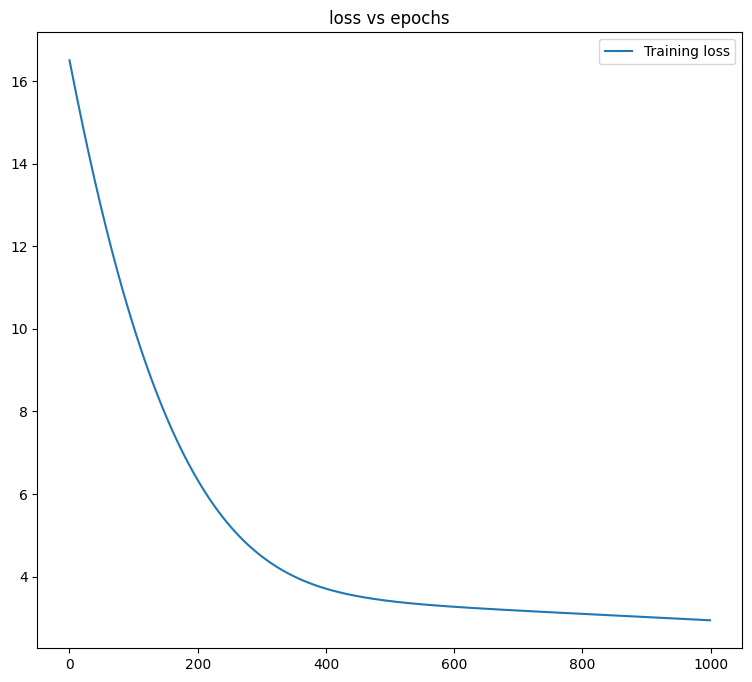

In [47]:
#model performance visualization
f = plt.figure(figsize=(20,8))

#loss
plt2 = f.add_subplot(122)
plt2.plot(history.history['loss'], label = str('Training loss'))
plt.legend()
plt.title('loss vs epochs')

plt.show()

In [48]:
cmap = plt.colormaps['jet'].copy()
cmap.set_bad('white')      # color of mask on heatmap
cmap.set_under('white')    # color of mask on cbar


In [49]:
IW = 512
IH = 512

size = KW / 2 #side length of kernel from center. 16x16 for size=8
maxSqrSize = 145 #length from center to edge
midx = IW/2
midy = IH/2


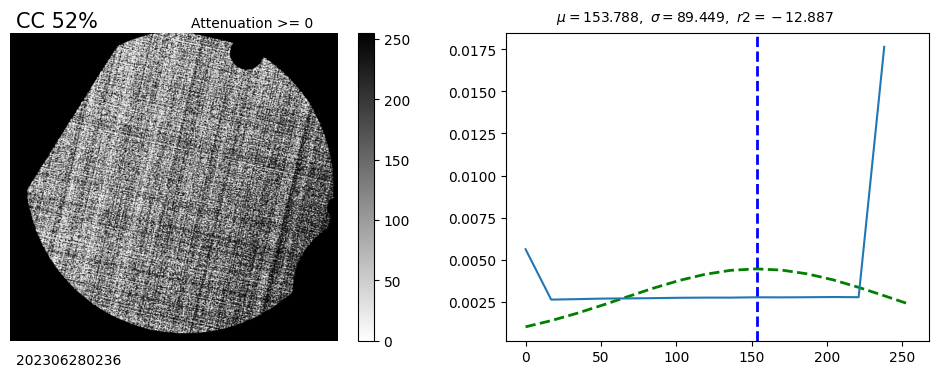

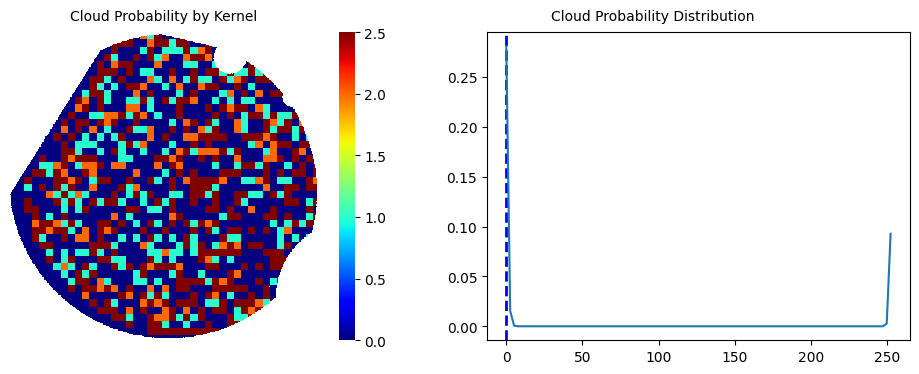

202306280236 52


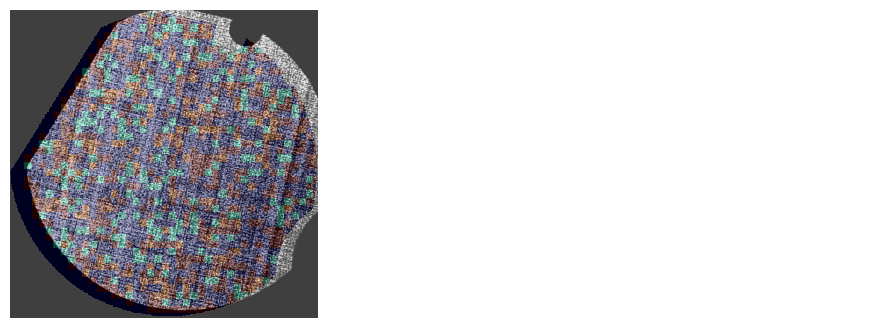

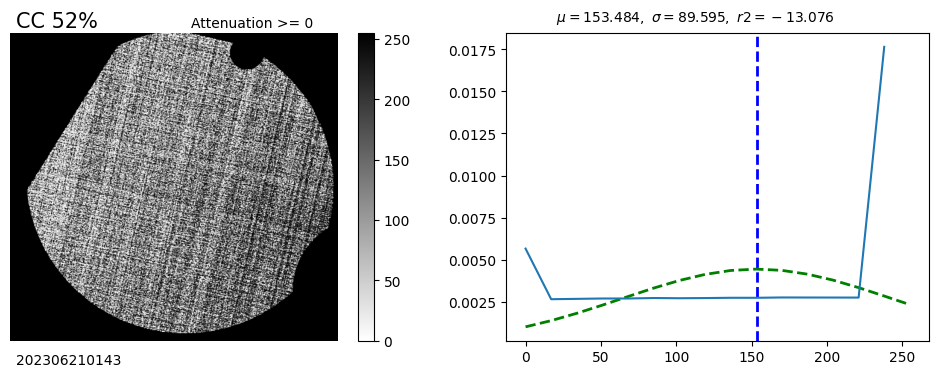

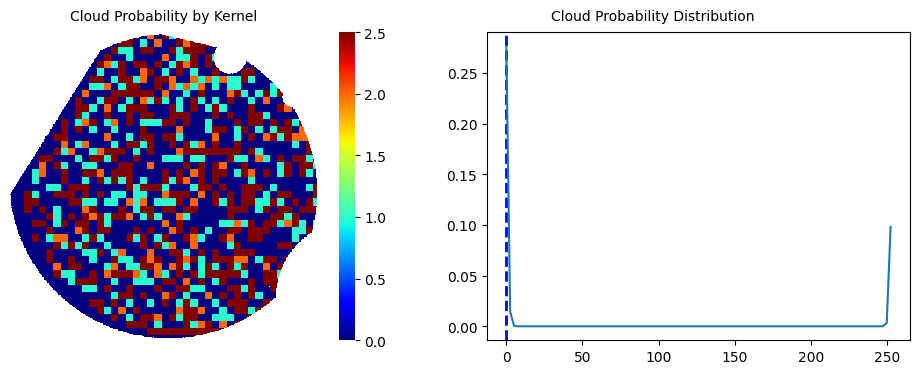

202306210143 52


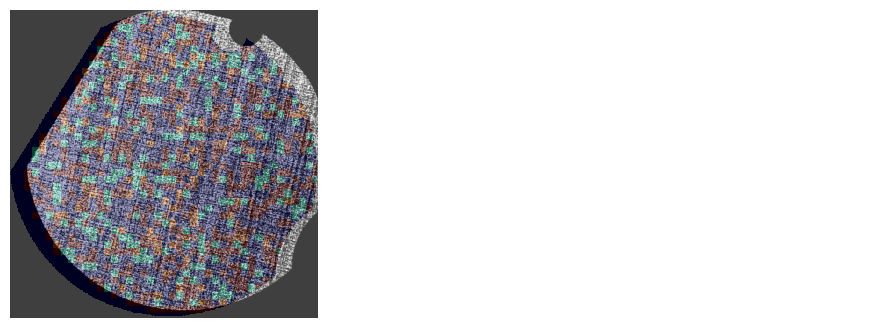

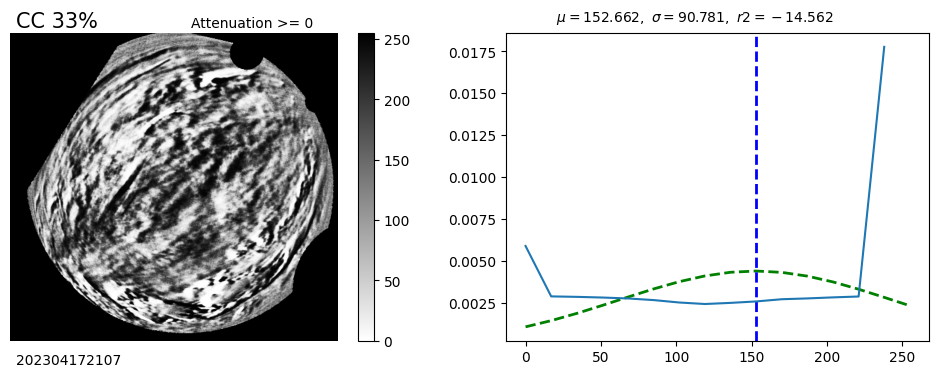

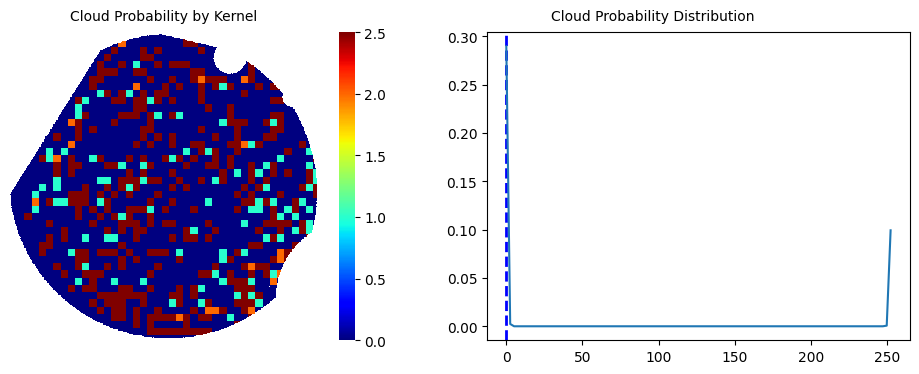

202304172107 33


KeyboardInterrupt: 

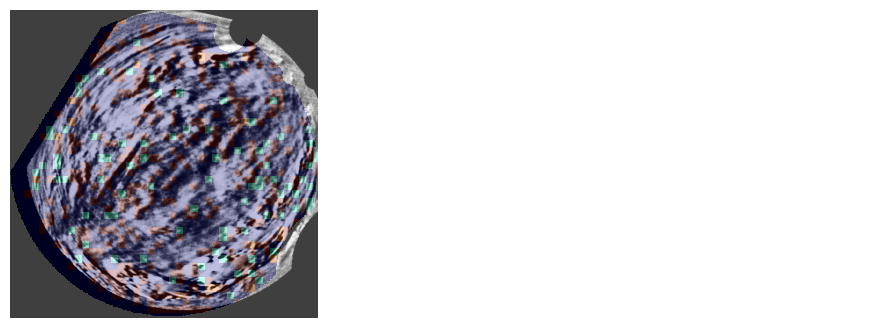

In [50]:
#load image

# make sure to check images from the mix,clear, and cloudy folders
folder="../images/"
i = 0
for file in glob.glob(folder + '/*.png'):

# how many tests do you want to look at
#for i in range(1):

#    while True:
#        a=random.choice(os.listdir(folder))
#        if "20200616_2253" in a:
#        if "20200619_2023" in a:
#        if "20230726_2242" in a:
#        if "20230718_0331" in a:
#        if "20230322_2048" in a:
#        if "20220927_0324" in a:
#        if "20220625_2352" in a:
#        if "20220501_0044" in a:
#        if "20220420_2102" in a:
#            break
#    a=random.choice(os.listdir(folder))
#    print (a)
    
#    file = folder+'/'+a
#    print(file)

#im = Image.open("./train/cloudy/202302042354a.png")

    filedate = file.split('/')[2].split('asiva')[1].split('.')[-2]

#    print (filedate, filetime)

    im = Image.open(file)

    imc = im
    x_locs = np.arange(size, IW, size * 2)
    y_locs = np.arange(size, IH, size * 2)

    heatmap = np.empty([IH, IW])

    heatmap_masked = []
    
    for y in y_locs:
        for x in x_locs:
            imk = imc.crop((x-size, y-size, x+size, y+size))
            imk.save("tmp.png")
            img = load_img("tmp.png", target_size=image_size)
            img_array = img_to_array(img)
            img_array = tf.expand_dims(img_array, 0)  # Create batch axis
        
            predictions = model.predict(img_array, verbose = 0)
            cloudy_score = predictions[0]

            size = int(size)
            y = int(y)
            x = int(x)
            
            for k_y in range(y-size, y+size):
                for k_x in range(x-size, x+size):
                    if (k_y >= IH):
                        continue
                    if (k_x >= IW):
                        continue
                    if (cloudy_score <= 0):
                        heatmap[k_y, k_x] = 0
                    if (cloudy_score >=2.5):
                        heatmap[k_y, k_x] = 2.5
                    
                    if (maskdata[k_y, k_x] != 1):
                        heatmap[k_y, k_x] = cloudy_score  
                        heatmap_masked.append(cloudy_score)
                    else:
                        heatmap[k_y, k_x] = 0 # was -1
    
  
    heat = np.uint8(heatmap)

#calculate percentage cloud coverage. Iterate through image 
#and for a given threshold value set value above to 1 and values below to 0 then average the array

    heatmap_filtered = np.ma.array(heat, mask=maskdata > 0.0)

    imarr = np.array(im)

    data = []
    hdata = []

    th = 0.2
    cloud_count = 0
    total = 0

    for i in range(len(heatmap_filtered)):
        for j in range(len(heatmap_filtered[0])):
            if(maskdata[i, j] < 1):
                total = total + 1
                data.append(imarr[i,j])
                hdata.append(heatmap_filtered[i,j])
                if(heatmap_filtered[i, j] > (th)):
                    cloud_count = cloud_count + 1
    #            else:
    #                print (cloud_count, i,j,heatmap_filtered[i,j])
                    
    #stats
    mu = np.average(data)
    sigma = np.std(data)

    # normalized distribution 
    histogram, bins = np.histogram(data, bins=15, density=True)

    # gaussian
    y = norm.pdf(bins, mu, sigma)

    # truncate last element to match up arrays
    y0 = np.delete(y, -1)

    # fundamental stats
    absError = histogram - y0        
    SE = np.square(absError) # squared errors
    MSE = np.mean(SE) # mean squared errors
    RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
    Rsquared = 1.0 - (np.var(absError) / np.var(y0))    

    fig = plt.figure(figsize=(12, 4))

    ax = fig.add_subplot(121)
    
    ia = ax.imshow(im, cmap='gray_r')
    plt.colorbar(ia)

    ax.text(10, -10, 'CC ' + str(int(cloud_count / total * 100)) + '%', fontsize=15)
    ax.text(300, -10, 'Attenuation >= ' + str((th)))
    ax.text(10, 550, filedate)
    ax.axis('off')
    plt.axis('off')

    ax1 = fig.add_subplot(122)
    ax1.plot(bins, y, 'g', linewidth=2, linestyle='--')
    ax1.axvline(mu, color='b', linewidth=2, linestyle='--')
    ax.text(900,-20, r'$\ \mu=%.3f,\ \sigma=%.3f,\ r2=%.3f$' % (mu, sigma, Rsquared))
    ax1.plot(bins[0:-1], histogram)

    #stats
    mu = np.average(hdata)
    sigma = np.std(hdata)

    # normalized distribution 
    histogram, bins = np.histogram(hdata, bins=100, density=True)

    # gaussian
    y = norm.pdf(bins, mu, sigma)

    # truncate last element to match up arrays
    y0 = np.delete(y, -1)

    # fundamental stats
    absError = histogram - y0        
    SE = np.square(absError) # squared errors
    MSE = np.mean(SE) # mean squared errors
    RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
    Rsquared = 1.0 - (np.var(absError) / np.var(y0))    

    fig.savefig('./img/' + filedate + '_0.png')

    fig2 = plt.figure(figsize=(12, 4))

    ax2 = fig2.add_subplot(121)
    ax2.text(100,-20, 'Cloud Probability by Kernel')

    hm = sns.heatmap(heat, cmap=cmap, vmin=0.0, vmax=2.5, cbar=True, annot=False, square=True, mask=maskdata>0.0, alpha=1.0)

    plt.axis('off')
    ax3 = fig2.add_subplot(122)
    ax3.axvline(int(th), color='b', linewidth=2, linestyle='--')
    ax2.text(900,-20, 'Cloud Probability Distribution')
    ax3.plot(bins[0:100:1], histogram)
    
    #save probability values
    f = open("./model/" + "/probabilities.txt", "w")
    for item in hdata:
        f.write(str(item) + "\n")
    f.close()

    plt.show()

    fig2.savefig('./img' + filedate + '_1.png')

    #imw = Image.open('./img/' + filedate + '_d.png')

    fig3 = plt.figure(figsize=(12, 4))

    fx1 = fig3.add_subplot(121)
    ia = fx1.imshow(im, cmap='gray_r')
    hm = sns.heatmap(heat, cmap=cmap, vmin=0.0, vmax=2.5, cbar=False, annot=False, square=True, mask=maskdata>0.0, alpha=0.25)

    fx1.axis('off')


    fx2 = fig3.add_subplot(122)
    fx2.axis('off')
    #fx2.imshow(imw)

    plt.axis('off')

    fig3.savefig('./img/' + filedate + '_3.png')

    print (filedate, int(cloud_count / total * 100))